<a href="https://colab.research.google.com/github/Mugundan-Senthilkumar/Mugundan/blob/main/The_Sparks_Foundation_GRIP_(Jan2021)_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundations- GRIP

# Task 2:Prediction using Unsupervised ML

# Author: Mugundan Senthilkumar

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets


# Data Collection

In [3]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data preparation

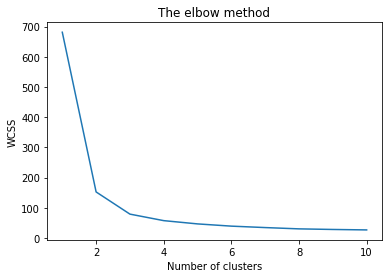

In [4]:
x = iris_df.iloc[:, :].values

from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init= 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Prediction & Visualization


In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

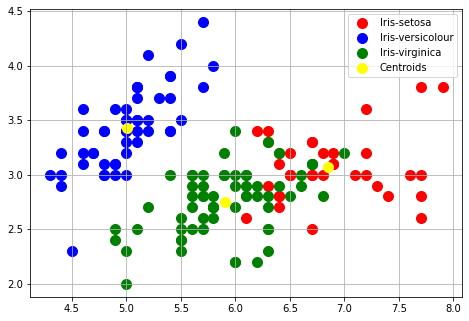

In [7]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids',)
plt.subplots_adjust(left=1, bottom=1, right=2, top=2)

plt.grid()
plt.legend()
